In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("../data/train_5folds.csv")
df.head()

,Unnamed: 0,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,kfold
0,0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,0
1,1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,2
2,2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,3
3,3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,3
4,4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,1


In [3]:
y_true = list()
for kfold in range(5):
    y_true.extend(df[df.kfold==kfold].Pawpularity.values.tolist())

In [4]:
y_true[:5]

[63, 22, 53, 98, 27]

In [5]:
preds = np.load("../preds/model_one_oof.npy").tolist()
preds[:5]

[46.4111328125, 25.7568359375, 60.693359375, 73.583984375, 37.0361328125]

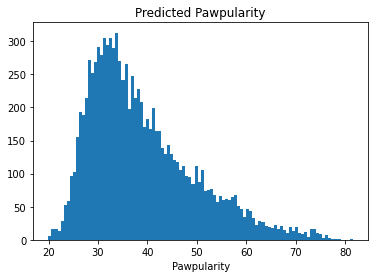

In [6]:
plt.hist(preds, bins=100)
plt.title('Predicted Pawpularity')
plt.xlabel('Pawpularity');

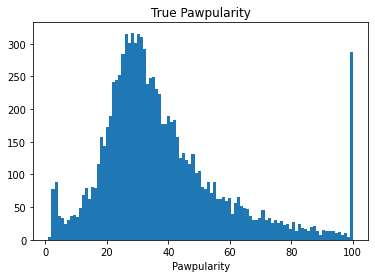

In [7]:
plt.hist(y_true, bins=100)
plt.title('True Pawpularity')
plt.xlabel('Pawpularity');

In [8]:
result = pd.DataFrame({"true": y_true, "pred": preds})
result.head()

,true,pred
0,63,46.411133
1,22,25.756836
2,53,60.693359
3,98,73.583984
4,27,37.036133


In [9]:
result["diff"] = result["pred"] - result["true"]
result.head()

,true,pred,diff
0,63,46.411133,-16.588867
1,22,25.756836,3.756836
2,53,60.693359,7.693359
3,98,73.583984,-24.416016
4,27,37.036133,10.036133


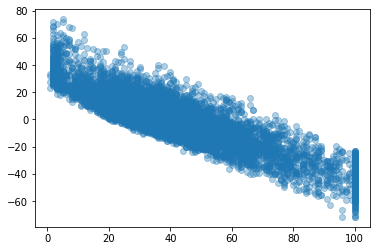

In [10]:
plt.scatter(x=result["true"].values, y=result["diff"].values, alpha=.35)

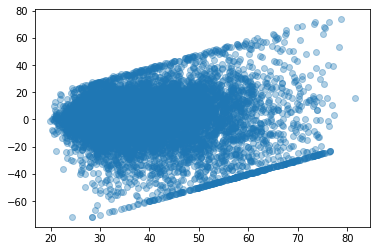

In [11]:
plt.scatter(x=result["pred"].values, y=result["diff"].values, alpha=.35)

In [12]:
result["quantile"] = [int(r/10.) for r in result["true"].values]
result.head()

,true,pred,diff,quantile
0,63,46.411133,-16.588867,6
1,22,25.756836,3.756836,2
2,53,60.693359,7.693359,5
3,98,73.583984,-24.416016,9
4,27,37.036133,10.036133,2


In [13]:
result.groupby('quantile')['diff'].agg(['mean', 'median', 'std', 'count'])

,mean,median,std,count
quantile,,,,
0,34.859171,32.210938,12.737387,367
1,17.844915,15.932617,8.976668,871
2,8.721535,7.442383,7.555283,2621
3,2.870030,1.704102,8.031531,2462
4,-3.001987,-4.204102,9.333052,1441
5,-9.813726,-10.983887,9.992725,762
6,-16.918569,-17.433594,10.534691,472
7,-23.743012,-23.344727,10.909608,301
8,-32.273544,-31.970703,11.366490,183


In [14]:
result["quantile_pred"] = [int(r/10.) for r in result["pred"].values]
result.head()

,true,pred,diff,quantile,quantile_pred
0,63,46.411133,-16.588867,6,4
1,22,25.756836,3.756836,2,2
2,53,60.693359,7.693359,5,6
3,98,73.583984,-24.416016,9,7
4,27,37.036133,10.036133,2,3


In [15]:
result.groupby('quantile_pred')['diff'].agg(['mean', 'median', 'std', 'count'])

,mean,median,std,count
quantile_pred,,,,
1,-1.017090,-1.017090,NaN,1
2,0.611577,1.539062,11.159484,2019
3,1.508904,3.207031,14.061719,4129
4,1.006979,4.017090,19.593978,2136
5,-0.228293,1.750977,25.112119,1088
6,-1.102372,-4.862305,28.618521,386
7,0.485020,-8.611328,29.637993,115
8,15.542969,15.542969,NaN,1


In [16]:
result.true.mean(), result.true.std(), result.true.median()

(38.05812658227848, 20.6041980933611, 33.0)

In [17]:
result.pred.mean(), result.pred.std(), result.pred.median()

(38.97076987737342, 10.690101354058315, 36.42578125)

In [18]:
result.groupby('quantile').pred.agg(['mean', 'median', 'std', 'count'])

,mean,median,std,count
quantile,,,,
0,39.540370,36.645508,12.156353,367
1,33.489002,31.469727,8.289866,871
2,33.716575,32.177734,7.374347,2621
3,36.855407,35.314941,8.108904,2462
4,40.954293,39.404297,9.135653,1441
5,44.261077,42.749023,9.948385,762
6,47.026346,46.789551,10.381442,472
7,50.290211,50.097656,10.377369,301
8,51.994215,52.050781,11.191922,183


The average prediction by true quantile is increasing. This is good as it shows that, on average, the model is predicting higher values for records belonging to higher quantiles. One notable exception is quantile 0. 

In [19]:
result.groupby('quantile_pred')['true'].agg(['mean', 'median', 'std', 'count'])#.mean()

,mean,median,std,count
quantile_pred,,,,
1,21.000000,21,NaN,1
2,26.620604,26,11.235505,2019
3,33.063211,31,14.234900,4129
4,43.330056,41,19.784865,2136
5,54.601103,52,25.361034,1088
6,65.147668,69,28.836421,386
7,72.747826,81,29.415607,115
8,66.000000,66,NaN,1


In [20]:
result[result['true']==100].pred.agg(['mean', 'median', 'std'])

mean      58.036126
median    58.032227
std       10.681871
Name: pred, dtype: float64

In [21]:
(result[result.true==100].pred < 50).mean()

0.2152777777777778

<AxesSubplot:xlabel='true'>

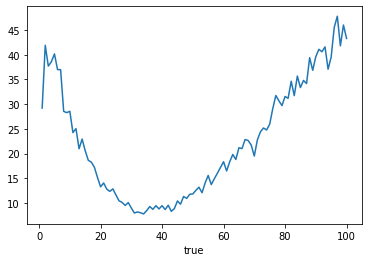

In [22]:
result.groupby('true')['diff'].apply(lambda x: np.sqrt(np.mean(np.power(x, 2)))).plot()

We are relatively good at predicting values around the mean, but not so good at predicting values at the edge of the distribution.

Perhaps we could create a multi-class classifier that predicts the decile or maybe something like "0<x<20", "20<x<50", "50<x<80", "80<x<100". We could them use these predictions are features for the (L1) ensemble.